In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## Read the training and test data sets previously split and stored as separage csv files
## The last column labelled '86' is the 0/1 label indicationg benign/malware for each sample row.

df_train = pd.read_csv("data/train_data.csv")
df_test = pd.read_csv("data/test_data.csv")

last_column = df_train.shape[1] - 1 ## index of the label column
X_train = df_train.iloc[:,:last_column]
y_train = df_train.iloc[:,last_column]

X_test = df_test.iloc[:,:last_column]
y_test = df_test.iloc[:,last_column]

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [93]:
tree = DecisionTreeClassifier()

parameters = {'max_depth':[3,5,7,10,12,13], 'min_samples_leaf':[1,2,5,10]}

model = GridSearchCV(tree, parameters, scoring='accuracy', verbose=3)

model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=3, min_s

[CV] END ...................max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ...................max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ..................max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END ..................max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END ..................m

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 12, 13],
                         'min_samples_leaf': [1, 2, 5, 10]},
             scoring='accuracy', verbose=2)

In [77]:
model.best_params_

{'max_depth': 12, 'min_samples_leaf': 1}

In [78]:
model.best_estimator_

DecisionTreeClassifier(max_depth=12)

In [86]:
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

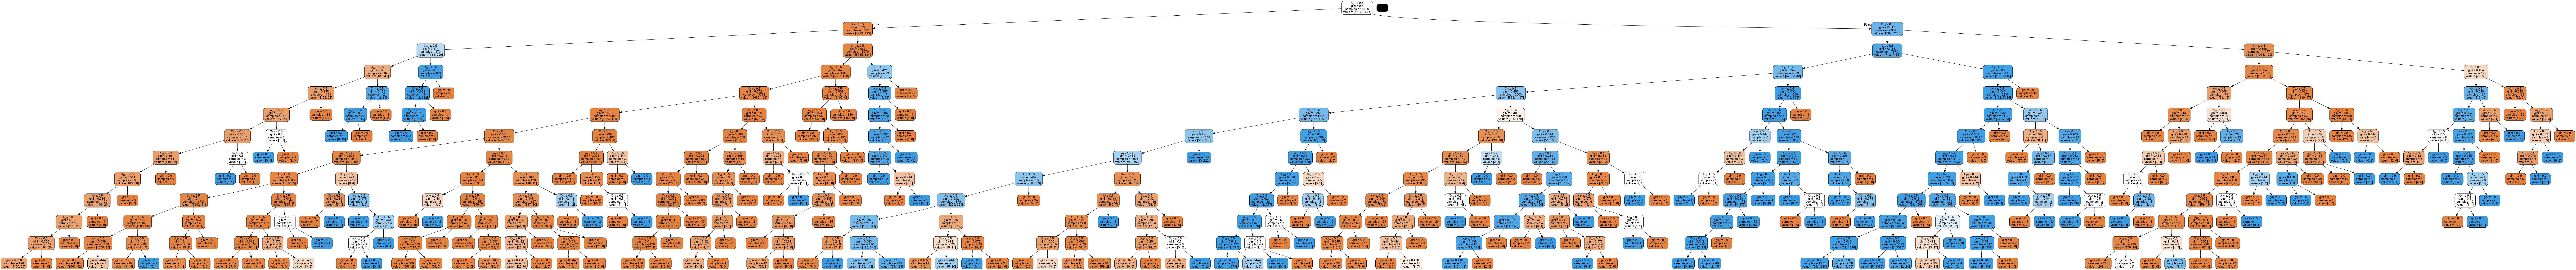

In [88]:
dot_data = StringIO()
export_graphviz(model.best_estimator_, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [94]:
yp = model.predict(X_test)
print('acc', accuracy_score(y_test, yp))
print('recall', recall_score(y_test, yp))
print('precision', precision_score(y_test, yp))
print('F1', f1_score(y_test, yp))
pd.DataFrame(confusion_matrix(y_test,yp))

acc 0.9554545454545454
recall 0.9570979335130279
precision 0.9549529359031824
F1 0.9560242315458829


,0,1
0,4147,201
1,191,4261
